# Clmate Data - For NOAA RESTORE

Understanding the impact of climate variability and change is of great importance for developing adaptation and mitigation strategies. Coarse resolution data sets such as simulations of general circulation models (GCMs) are important for reconstructing historical climate and predicting the future. However, scale discrepancy and biases limit the coarse resolution data sets from being directly used for impact assessments and decision making. One solution for bridging this gap is to downscale and bias correct coarse resolution data to the local scale.

We used quantile delta mapping (QDM) to bias correct and downscale 5 popular GCMs outputs for 9 variables including daily precipitation and maximum temperature. Compared to quantile mapping method, QDM accounts for the difference between historical and future climate scenario data and thus is capable of preserving trend of the future climate. QDM has been widely used to bias correct climate variables in recent studies, which indicated better performance compared to the other bias correction approaches. We chose a widely used reanalysis data ERA5 as reference dataset in the historical period (1979 to 2014). Two emission levels of SSP126 (low level) and SSP585 (high level) are bias corrected and downscaled for the projection period (2015 to 2100) for each GCM. 

Team:
- Fang Wang, Di Tian
- Hydroclimate Research Group, Department of Crop, Soil and Environmental Sciences, Auburn University

In [1]:
# import packages
import numpy as np
import xarray as xr

In [2]:
# download ERA5 precipitaton data as observed historical precipitatiodata with wget
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/ERA5-single-daily/pr_1959-2014_daily_invert.nc

--2023-03-23 01:21:45--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/ERA5-single-daily/pr_1959-2014_daily_invert.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.38, 152.54.11.37, 152.54.11.36
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 754427768 (719M) [application/x-netcdf]
Saving to: ‘pr_1959-2014_daily_invert.nc’

pr_1959-2014_daily_ 100%[===================>] 719.48M  57.0MB/s    in 13s     

2023-03-23 01:21:58 (56.4 MB/s) - ‘pr_1959-2014_daily_invert.nc’ saved [754427768/754427768]



In [3]:
# load ERA5 historical data
hist_pr=xr.open_dataset('pr_1959-2014_daily_invert.nc',
                       engine='netcdf4', decode_times=False)
pr_hist=hist_pr.tp[7305:,5:43,19:61]
time_hist=hist_pr.time[7305:]

## Map of our Study Area
The study area includes the entire mobile bay watershed and the ocean area nearby the outlet of model bay watershed as shown the rectangular area below. In additional, the figure below also shows the long term mean of daily precipitation from the reference dataset (ERA5) over the historical period in the unit of mm.  

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: 

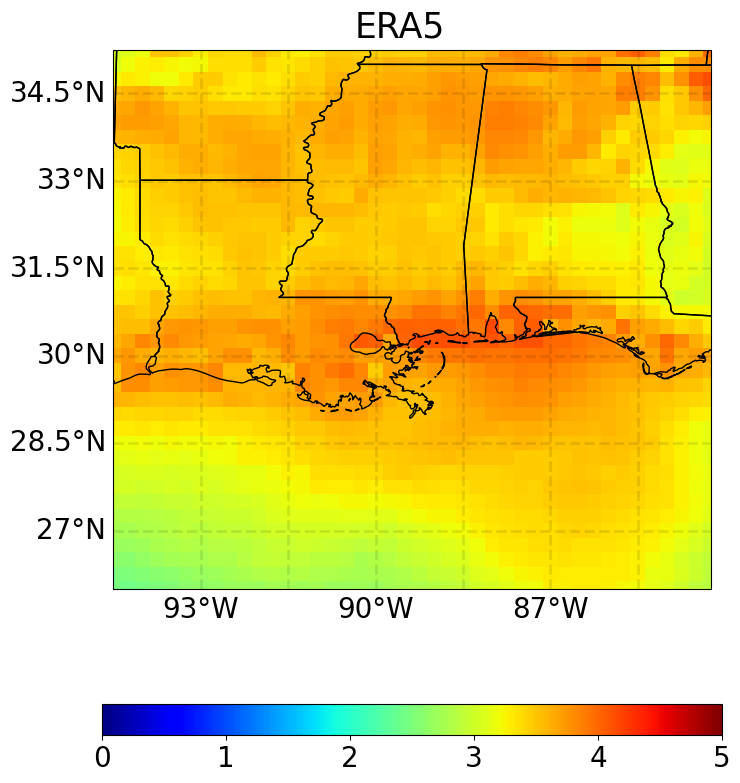

In [4]:
#spatial distribution from mean
# for ERA5 from 1979
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10, 10))
fig.suptitle('ERA5', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(hist_pr.tp[7305:,5:43,19:61]*1000, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("/glade/work/fangwang/QDM/pr_ERA5_spatial.jpg", bbox_inches='tight', dpi=300)

In [5]:
import pandas as pd
date_hist=pd.to_datetime(time_hist, unit='h', origin=pd.Timestamp('1900-01-01 00:00:00'))

In [6]:
pr_hist_array=xr.DataArray(pr_hist.data, coords={'time': pr_hist.time, 'latitude': pr_hist.latitude,'longitude': pr_hist.longitude}, dims=["time", "latitude", "longitude"])
pr_hist_date=pr_hist_array.assign_coords(time=date_hist)
pr_hist_yearly=pr_hist_date.resample(time='Y', closed='right').sum(dim='time')
pr_hist_yearly_area_mean=np.mean(pr_hist_yearly.values, axis=(1,2))*1000

In [8]:
# load bias corrected and downscaled EC_Earth3 projection data for ssp126
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp126/pr_QDM_2015-2100.nc

--2023-03-23 01:30:18--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp126/pr_QDM_2015-2100.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.38, 152.54.11.36, 152.54.11.37
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200781088 (191M) [application/x-netcdf]
Saving to: ‘pr_QDM_2015-2100.nc.1’

pr_QDM_2015-2100.nc 100%[===================>] 191.48M  57.7MB/s    in 3.5s    

2023-03-23 01:30:22 (54.4 MB/s) - ‘pr_QDM_2015-2100.nc.1’ saved [200781088/200781088]



In [23]:
Earth3_ssp126_pr=xr.open_dataset('pr_QDM_2015-2100_ssp126.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_ssp126=Earth3_ssp126_pr.pr
Earth3_time_ssp126=Earth3_ssp126_pr.time

In [24]:
import pandas as pd
Earth3_date_ssp126=pd.to_datetime(Earth3_time_ssp126, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))

In [25]:
Earth3_pr_ssp126_array=xr.DataArray(Earth3_pr_ssp126.data, coords={'time': Earth3_pr_ssp126.time, 'lat': Earth3_pr_ssp126.lat,'lon': Earth3_pr_ssp126.lon}, dims=["time", "lat", "lon"])
Earth3_pr_ssp126_date=Earth3_pr_ssp126_array.assign_coords(time=Earth3_date_ssp126)
Earth3_pr_ssp126_yearly=Earth3_pr_ssp126_date.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_ssp126_yearly_area_mean=np.mean(Earth3_pr_ssp126_yearly.values, axis=(1,2))

In [14]:
# load bias corrected and downscaled EC_Earth3 projection data for ssp585
!wget https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp585/pr_QDM_2015-2100.nc

--2023-03-23 01:33:29--  https://renc.osn.xsede.org/ees210015-bucket01/climate/NOAA_data/QDM/EC-Earth3/ssp585/pr_QDM_2015-2100.nc
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.38, 152.54.11.36, 152.54.11.37
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200781088 (191M) [application/x-netcdf]
Saving to: ‘pr_QDM_2015-2100.nc.1’

pr_QDM_2015-2100.nc 100%[===================>] 191.48M  56.6MB/s    in 3.6s    

2023-03-23 01:33:33 (52.6 MB/s) - ‘pr_QDM_2015-2100.nc.1’ saved [200781088/200781088]



In [26]:
Earth3_ssp585_pr=xr.open_dataset('pr_QDM_2015-2100_ssp585.nc',
                       engine='netcdf4', decode_times=False)
Earth3_pr_ssp585=Earth3_ssp585_pr.pr
Earth3_time_ssp585=Earth3_ssp585_pr.time

In [27]:
import pandas as pd
Earth3_date_ssp585=pd.to_datetime(Earth3_time_ssp585, unit='D', origin=pd.Timestamp('1850-01-01 00:00:00'))

In [28]:
Earth3_pr_ssp585_array=xr.DataArray(Earth3_pr_ssp585.data, coords={'time': Earth3_pr_ssp585.time, 'lat': Earth3_pr_ssp585.lat,'lon': Earth3_pr_ssp585.lon}, dims=["time", "lat", "lon"])
Earth3_pr_ssp585_date=Earth3_pr_ssp585_array.assign_coords(time=Earth3_date_ssp585)
Earth3_pr_ssp585_yearly=Earth3_pr_ssp585_date.resample(time='Y', closed='right').sum(dim='time')
Earth3_pr_ssp585_yearly_area_mean=np.mean(Earth3_pr_ssp585_yearly.values, axis=(1,2))

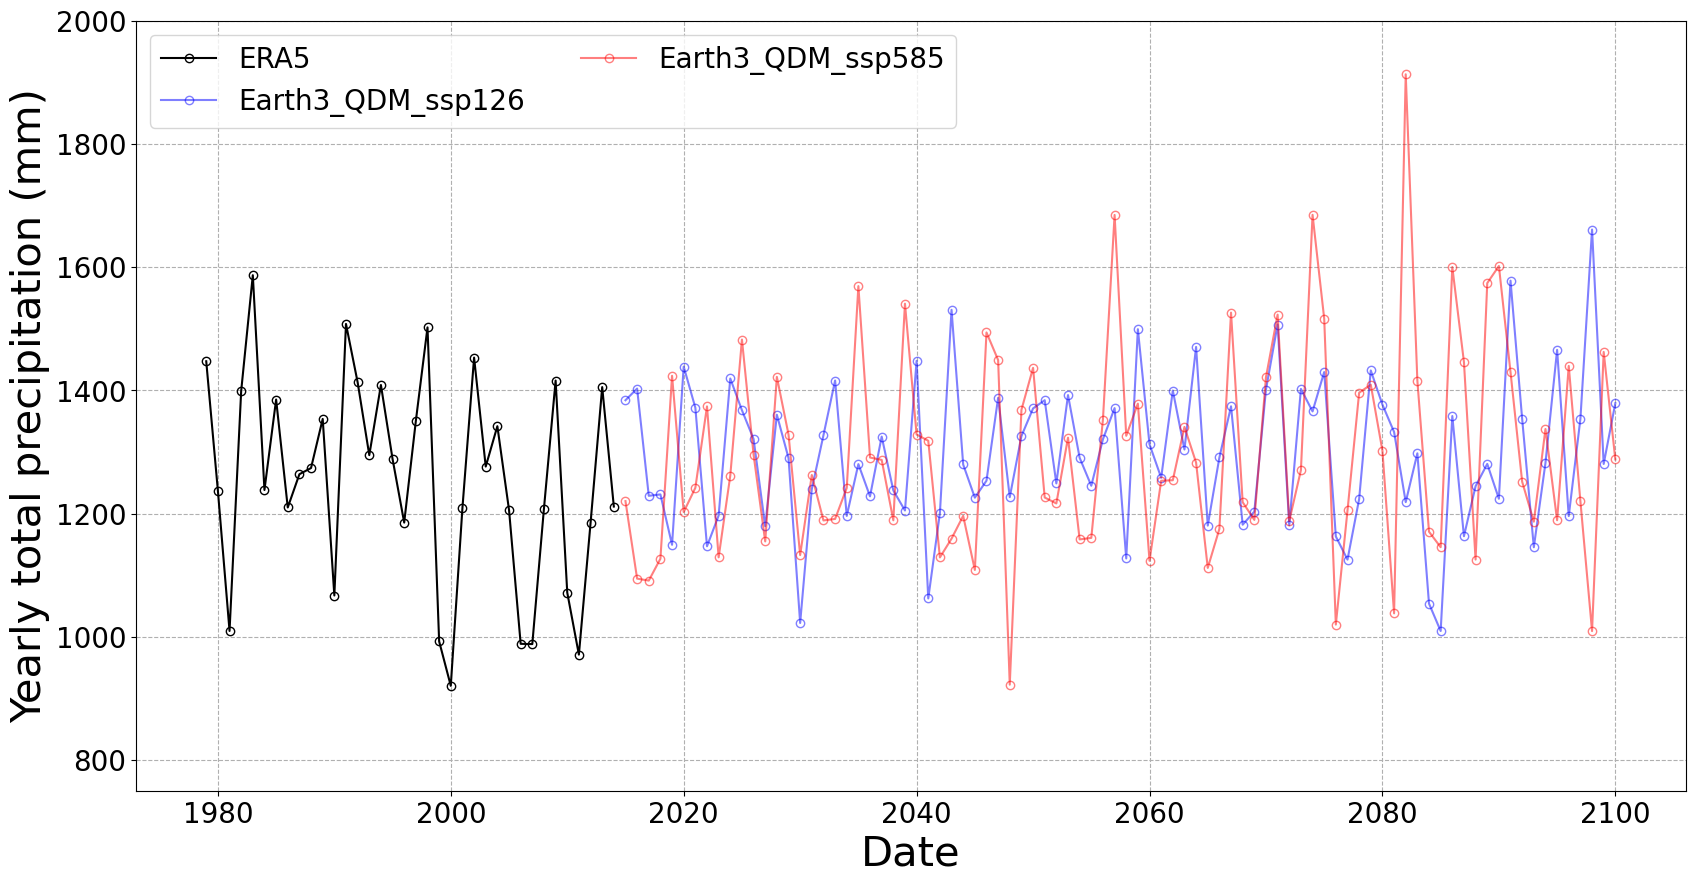

In [29]:
import matplotlib.pyplot as plt
names=[np.datetime64(u,'Y') for u in pr_hist_yearly.time.data]
names_ssp=[np.datetime64(u,'Y') for u in Earth3_pr_ssp126_yearly.time.data]
fig, ax = plt.subplots(figsize=(20, 10))
#fig.suptitle('Monthly Mean', fontsize=30, x=0.5, y=0.95)
plt.rcParams.update({'font.size': 20})
ax.plot(names, pr_hist_yearly_area_mean, color='black', marker="o",mfc='none',label="ERA5")
ax.plot(names_ssp, Earth3_pr_ssp126_yearly_area_mean, color='blue', marker="o", mfc='none',label="Earth3_QDM_ssp126", alpha=0.5)
ax.plot(names_ssp, Earth3_pr_ssp585_yearly_area_mean, color='red',  marker="o",mfc='none',label="Earth3_QDM_ssp585", alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Yearly total precipitation (mm)', fontsize=30)
plt.grid(True, linestyle='--') 
plt.ylim(750, 2000)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax.legend(ncol=2)
#plt.show()

#plt.savefig("/adapt/nobackup/people/fwang6/model3/Results/Daily sum in 2019 including qdm.jpg", bbox_inches='tight', dpi=300)

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


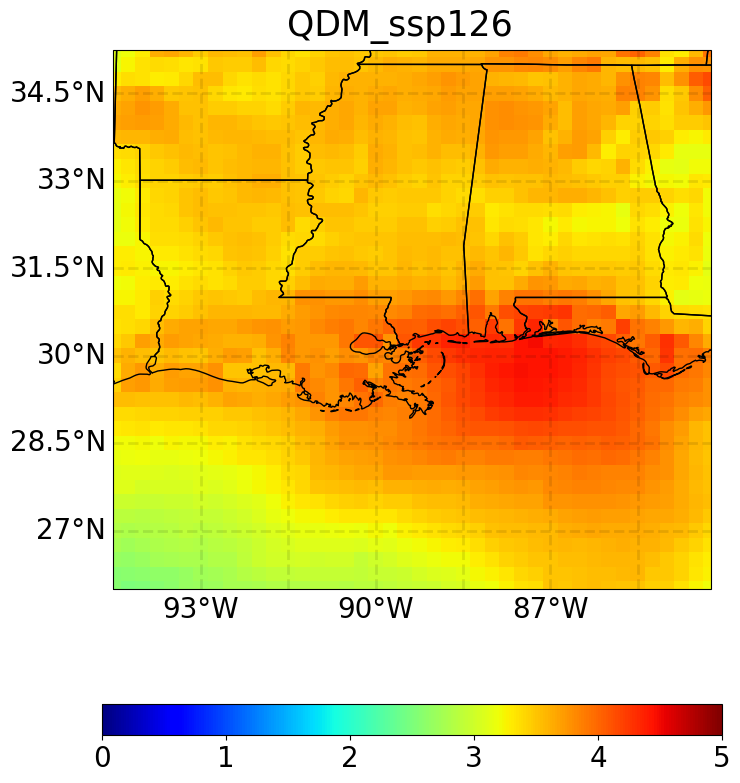

In [30]:
#spatial distribution from mean
# for ERA5 from 1979
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('QDM_ssp126', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(Earth3_pr_ssp126.data, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, tp_merra2_test[23300,:,:], transform=ccrs.PlateCarree(),vmin=0.0, vmax=20, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, np.mean(merra2.tp[:23330,:,:].values, axis=0), transform=ccrs.PlateCarree(),vmin=0.08, vmax=0.24, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("/glade/work/fangwang/QDM/pr_QDM_ssp126_spatial.jpg", bbox_inches='tight', dpi=300)

/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


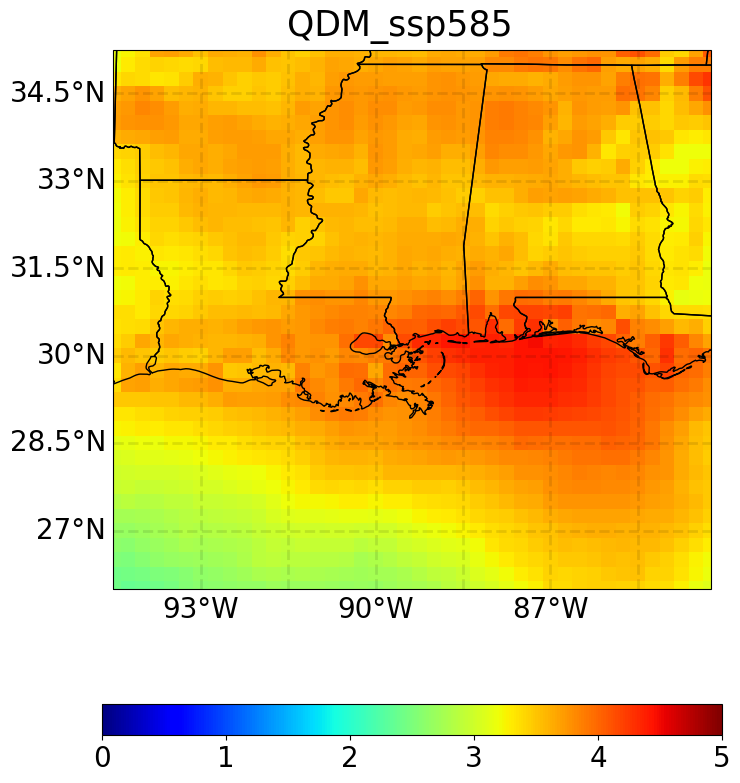

In [31]:
#spatial distribution from mean
# for ERA5 from 1979
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(10, 10))
fig.suptitle('QDM_ssp585', fontsize=25,x=0.5,y=0.92)
plt.rcParams.update({'font.size': 20})
m=plt.axes(projection=ccrs.PlateCarree())
m.set_extent([-94.5, -84.25, 26.00, 35.25], ccrs.PlateCarree())
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAND, edgecolor='grey')
#m.add_feature(cartopy.feature.LAKES, edgecolor='black')
m.add_feature(cartopy.feature.STATES)
#m.gridlines()
c=m.pcolormesh(hist_pr.longitude.data[19:61], hist_pr.latitude.data[5:43], np.mean(Earth3_pr_ssp585.data, axis=0), transform=ccrs.PlateCarree(),vmin=0, vmax=5, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, tp_merra2_test[23300,:,:], transform=ccrs.PlateCarree(),vmin=0.0, vmax=20, cmap='jet')
#c=m.pcolormesh(merra2.lon.data, merra2.lat.data, np.mean(merra2.tp[:23330,:,:].values, axis=0), transform=ccrs.PlateCarree(),vmin=0.08, vmax=0.24, cmap='jet')
plt.colorbar(c, orientation="horizontal", shrink=0.8)
gl = m.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.1, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

#plt.savefig("/glade/work/fangwang/QDM/pr_QDM_ssp585_spatial.jpg", bbox_inches='tight', dpi=300)